In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
import re
import json
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Population of NYC.csv')
df.head()

,Year,New York City Population
0,1979,7102100
1,1980,7071639
2,1981,7089241
3,1982,7109105
4,1983,7181224


In [4]:
df = df.rename(columns={'New York City Population':'Population'})

In [5]:
df.head()

,Year,Population
0,1979,7102100
1,1980,7071639
2,1981,7089241
3,1982,7109105
4,1983,7181224


In [6]:
x = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)

In [7]:
lr = linear_model.LinearRegression()
lr.fit(x, y)

LinearRegression()

In [8]:
print('Coefficients: ', lr.coef_)

Coefficients:  [[44483.68136515]]


In [9]:
print('Variance score: {}'.format(lr.score(x, y)))

Variance score: 0.965316842356601


In [ ]:
# plt.style.use('fivethirtyeight')
# plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, color = "green", s = 20, label = 'Train data')

# plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, color = "blue", s = 20, label = 'Test data')

# plt.legend(loc = 2)
# plt.title("Residual errors")
# plt.show()

Text(0, 0.5, 'Population')

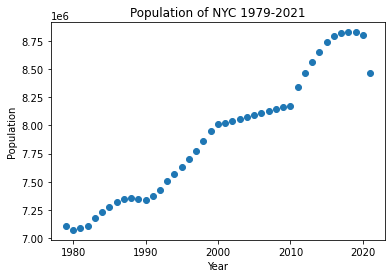

In [10]:
plt.scatter(x,y)
plt.title('Population of NYC 1979-2021')
plt.xlabel('Year')
plt.ylabel('Population')

In [11]:
pred = lr.predict(x)

In [12]:
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred) #Best fit lineplt.scatter(x, y)

print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , lr.intercept_)
print("Slope :" , lr.coef_)

Mean Squared Error :  10948910598.510565
R-Squared : 0.965316842356601
Y-intercept : [-81063902.12564178]
Slope : [[44483.68136515]]


In [ ]:
# import statsmodels.api as sm

# #adding a constant
# X = sm.add_constant(x)

# #performing the regression
# result = sm.OLS(y, x).fit()

# # Result of statsmodels 
# print(result.summary())

In [ ]:
# # Predicting values from 2022 to 2100
# pop=[]
# for i in range(2020,2100):
#   pop.append(model.predict([[i]]))

Text(0, 0.5, 'Population')

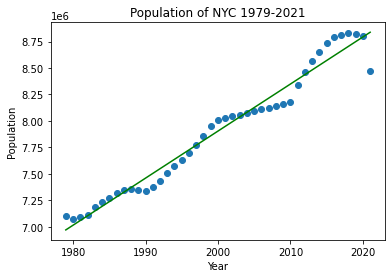

In [13]:
plt.scatter(x,y)
plt.plot(x,pred,color='green')
plt.title('Population of NYC 1979-2021')
plt.xlabel('Year')
plt.ylabel('Population')

In [14]:
p = pd.read_csv('Projection.csv')
p

,Year
0,2025
1,2026
2,2027
3,2028
4,2029
...,...
71,2096
72,2097
73,2098
74,2099


In [ ]:
fp = lr.predict(p)

In [ ]:
p['Population'] = fp
p

,Year,Population
0,2025,9.015553e+06
1,2026,9.060036e+06
2,2027,9.104520e+06
3,2028,9.149004e+06
4,2029,9.193487e+06
...,...,...
71,2096,1.217389e+07
72,2097,1.221838e+07
73,2098,1.226286e+07
74,2099,1.230735e+07


In [ ]:
# NYC 2015 Population data extracted from water demand csv
data = [[2015,8445115]]
df = pd.DataFrame(data,columns=['Year','Population'])
df

,Year,Population
0,2015,8445115


In [ ]:
frames = [df,p]
final = pd.concat(frames)
final

,Year,Population
0,2015,8.445115e+06
0,2025,9.015553e+06
1,2026,9.060036e+06
2,2027,9.104520e+06
3,2028,9.149004e+06
...,...,...
71,2096,1.217389e+07
72,2097,1.221838e+07
73,2098,1.226286e+07
74,2099,1.230735e+07


In [ ]:
final['Growth Rate %'] = final['Population'].pct_change()+1
final

,Year,Population,Growth Rate %
0,2015,8.445115e+06,NaN
0,2025,9.015553e+06,1.067546
1,2026,9.060036e+06,1.004934
2,2027,9.104520e+06,1.004910
3,2028,9.149004e+06,1.004886
...,...,...,...
71,2096,1.217389e+07,1.003667
72,2097,1.221838e+07,1.003654
73,2098,1.226286e+07,1.003641
74,2099,1.230735e+07,1.003628


In [ ]:
final['Population'] = final['Population'].apply(np.floor).astype(int)

In [ ]:
final

,Year,Population,Growth Rate %
0,2015,8445115,NaN
0,2025,9015552,1.067546
1,2026,9060036,1.004934
2,2027,9104520,1.004910
3,2028,9149003,1.004886
...,...,...,...
71,2096,12173894,1.003667
72,2097,12218377,1.003654
73,2098,12262861,1.003641
74,2099,12307345,1.003628


In [ ]:
final = final.fillna(0)

In [ ]:
final

,Year,Population,Growth Rate %
0,2015,8445115,0.000000
0,2025,9015552,1.067546
1,2026,9060036,1.004934
2,2027,9104520,1.004910
3,2028,9149003,1.004886
...,...,...,...
71,2096,12173894,1.003667
72,2097,12218377,1.003654
73,2098,12262861,1.003641
74,2099,12307345,1.003628


In [ ]:
final.to_csv('NYC Population Prediction 2015-2100.csv')